# 使用 Logistic Rregression，分析入學的可能性

## 簡介

這份資料是印度某大學的資料，共有 400 筆資料，9 個欄位。

裏面的每筆資料都是一位碩班候選人的資料。

這些資料有如下欄位：

- Serial No. 候選人序號
- GRE Scores (290 to 340)  GRE 分數
- TOEFL Scores (92 to 120) 托福分數
- University Rating (1 to 5) 大學的評比
- Statement of Purpose (1 to 5) 為什麼要入學的理由 (讀書計畫)
- Letter of Recommendation Strength (1 to 5) 推薦信的強度
- Undergraduate CGPA (6.8 to 9.92) 大學的累進 GPA
- Research Experience (0 or 1) 是否有研究的經驗
- Chance of Admit (0.34 to 0.97) 入學的機率

上述的 Chance of Admit 是我們要做分類的標的。

也就說，我們想透過分類演算法，分析研究所的評審是透過什麼樣的機制來評斷學生能不能入學的。

這份資料的相關說明，可以參考[這裏](https://www.kaggle.com/mohansacharya/graduate-admissions#Admission_Predict.csv)


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 重新命名欄位，方便日後程式撰寫

上面有些欄位的名稱有點冗長，日後寫程式起來蠻累的，我們將它們改成較短的名字。

在此之前，先做好對照表，免得日後想不起來原本的欄位名稱。

<table>
    <tr>
        <td>原欄位</td>
        <td>新欄位</td>
    </tr>
    <tr>
        <td>GRE Score</td>
        <td>GRE</td>
    </tr>
    <tr>
        <td>University Rating</td>
        <td>Rating</td>
    </tr>
    <tr>
        <td>TOEFL Score</td>
        <td>TOEFL</td>
    </tr>
    <tr>
        <td>Chance of Admit</td>
        <td>Chance</td>
    </tr>    
</table>

請注意， Chance of Admit 這個欄位的後面，其實有一個<font color="red">小小的空白</font>。

要注意這個小問題，不然寫程式時，會找不到這個欄位。

In [4]:
df.rename(columns={'GRE Score':'GRE', 'University Rating':'Rating', 
                  'TOEFL Score':'TOEFL', 'Chance of Admit ':'Chance'},
         inplace=True)
df.head() #再呼叫一次 head() 確定欄位都有改過了

,Serial No.,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Remove Serial No.

Since ``Serial No.`` does not affect our prediction result, we remove it from the dataframe.

由於 ``Serial No.`` 應該不會影響到我們的分類結果，所以我們將這個欄位給移除掉。

In [5]:
df.drop(columns=['Serial No.'], inplace=True)
df.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


We assume that if the chance of admit is higher than or equal to 0.75, then his admission is allowed.  
Otherwise the admission is rejected.

在底下，我們假設若 chance 大於等於 0.75，就代表可以入學。  
反之，就代表無法入學。

In [6]:
df.loc[df.Chance >= 0.75, 'Chance'] = 1
df.loc[df.Chance < 0.75, 'Chance'] = 0
df.head(10)


,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Chance
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,1.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0
5,330,115,5,4.5,3.0,9.34,1,1.0
6,321,109,3,3.0,4.0,8.20,1,1.0
7,308,101,2,3.0,4.0,7.90,0,0.0
8,302,102,1,2.0,1.5,8.00,0,0.0
9,323,108,3,3.5,3.0,8.60,0,0.0


## Observe the information of the dataframe

We find that some of columns are in the integer datatype.

我們發現有些欄位是「整數」型別。  
日後在計算時，我們要將之轉為浮點數型別。

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GRE       400 non-null    int64  
 1   TOEFL     400 non-null    int64  
 2   Rating    400 non-null    int64  
 3   SOP       400 non-null    float64
 4   LOR       400 non-null    float64
 5   CGPA      400 non-null    float64
 6   Research  400 non-null    int64  
 7   Chance    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


## 切出 x 及 y

In [8]:
y = df.Chance
y.head()
x = df.drop(columns=['Chance'])
x.head(10)

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


## 分割出測試集，以及訓練集

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

## Standardization (標準化)

Standardize features by removing the mean and scaling to unit variance. 

More specifically, we apply the following function to each data item in the dataframe.

$\frac{X-\mu}{\sigma}$

where $\mu$ is the mean of the training samples and $\sigma$ is the standard deviation of the training samples.

我們將資料標準化，否則計算的結果會失真。

標準化是將所有的資料值減去整體的平均值（$\mu$），再除以標準差（$\sigma$）。  
也就是說，就是對所有的資料，都做底下的運算：

$\frac{X-\mu}{\sigma}$

The difference between ``fit_transform`` and ``transform``

- fit_transform: Fit to data (i.e., Compute the mean and std), then transform it. 直對資料集計算均值，以及標準差。然後替資料集做標準化
- transform: Perform standardization by centering and scaling. 將資料集做標準化。

We apply fit_transform on the training data and then get $\mu$ and $\sigma$ of the dataset.  
Then we have to apply the same transformation to your testing set, or to newly obtained examples before forecast. But we have to use the **same two parameters $\mu$ and $\sigma$ (values)** that we used for centering the training set. See [here](https://datascience.stackexchange.com/questions/12321/difference-between-fit-and-fit-transform-in-scikit-learn-models) for more clarity.

一般說來，我們會針對「training set」做 fit_transform 的動作。  
這個動作完成後，我們會標準化 training set，同時得到 training set 上的平均值（$\mu$），以及標準差（$\sigma$）。

接著我們要處理 testing set。這時我們就不能用 testing set 上自己的 $\mu$ 還有 $\sigma$ 來標準化它自己了！！  
為什麼？  
因為我們的模型，是針對 training set 上的平均值，以及標準差訓練出來的。  
對於我們的模型，testing set 代表著是「未知」的資料，它是「不知道」這些未知資料的資訊的。  
所以只能假設這些未知的資料，其均值和標準差，是和 training set 一樣的。

因此我們使用 transform 來直接標準化 testing set。  
在使用 transform 時，sklearn 會用之前算出來的均值，以及標準差來標準化 testing set 上的資料。


In [10]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train.astype(float) # 將所有的欄位都轉成浮點數 casting to the float type
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs')
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
y_pred = classifier.predict(x_test)

## Draw the confusion matrix

[The document of sklearn's confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix $C$  is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

Thus in binary classification, the count of true negatives is $C_{0,0}$, false negatives is $C_{1,0}$, true positives is $C_{1,1}$ and false positives is $C_{0,1}$.


|                     |Negative <br/> Predict | Positive <br/> Predict |
|---------------------|-----------------------|------------------------|
|Negative <br/> Actual|TN                     | FP                     |
|Positive <br/> Actual|FN                     | TP                     |


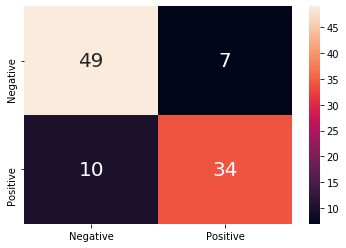

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = ['Negative', 'Positive'],
                  columns = ['Negative', 'Positive'])
sns.heatmap(df_cm, annot = True, annot_kws = {'size':20})

In [14]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f"準確率 {acc:.2f}")

準確率 0.83


準確率為 83%，這是好是壞呢？

我們需要有一個 **基準值** 來衡量。  
一般來說，我們會用「隨便猜」的方式，來衡量分類的水準。  
這是說，我們分類的模型，至少要優於「隨便猜」的水平，不然我們就隨便猜就好了。

那隨便猜要怎麼猜？  
底下的程式中，我們估計每種可能性的機率。  
在這個案例中：
- 無法入學的機率是 55%
- 可以入學的機率是 45%

所以要是隨便猜的話，我們就「永遠」猜無法入學即可。

在這樣隨便猜的情況下，我們有 55% 的精確度。  
這意味著，我們的模型的精確度，要優於 55%，才有價值。

In [15]:
v = y.shape[0]
print(f"總學生人數為 {v}")
print("入學可能性的資料分佈")
print(y.value_counts())
print("入學可能性的機率")
print(y.value_counts()/v)


總學生人數為 400
入學可能性的資料分佈
0.0    220
1.0    180
Name: Chance, dtype: int64
入學可能性的機率
0.0    0.55
1.0    0.45
Name: Chance, dtype: float64


In [20]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
acc = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred, pos_label=1)
r = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f'Accuracy = {acc}')
print(f'Precision = {p:.2f}')
print(f'Recall = {r:.2f}')
print(f'F1 = {f1:.2f}')

Accuracy = 0.83
Precision = 0.83
Recall = 0.77
F1 = 0.80


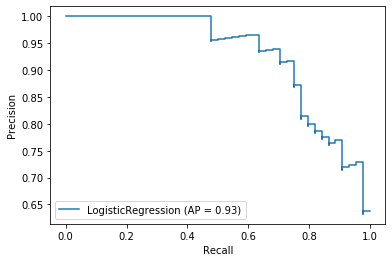

In [17]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(classifier, x_test, y_test)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85        56
         1.0       0.83      0.77      0.80        44

    accuracy                           0.83       100
   macro avg       0.83      0.82      0.83       100
weighted avg       0.83      0.83      0.83       100

